<a href="https://colab.research.google.com/github/cosmicrolex/Movies_review_sentiment_analyzer/blob/main/Review_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install numpy pandas scikit-learn nltk matplotlib seaborn


# New Section

In [14]:
import pandas as pd
import numpy as np
import sklearn
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
df = pd.read_csv('/IMDB Dataset.csv')

In [16]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
df.duplicated().sum()


np.int64(418)

In [18]:
import pandas as pd

train_df = pd.read_csv('/IMDB Dataset.csv')
train_df = train_df.sample(frac=1).reset_index(drop=True)  # this Shuffle the rows in random order
train_df.head()


,review,sentiment
0,"Sheba Baby, is another Pam Grier Blaxploitatio...",positive
1,This is a film that everyone should watch. Qui...,positive
2,"Having been a fan of 'Columbo', I was sorely d...",positive
3,"This Oscar-winning short film (40 minutes), ba...",positive
4,"Kristine Watts (Molie Weeks) is broken apart, ...",positive


In [19]:
import re #regular expressions library
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # remove special characters
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

train_df['cleaned_review'] = train_df['review'].apply(preprocess)
train_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment,cleaned_review
0,"Sheba Baby, is another Pam Grier Blaxploitatio...",positive,sheba baby another pam grier blaxploitation fi...
1,This is a film that everyone should watch. Qui...,positive,film everyone watch quite apart raising hugely...
2,"Having been a fan of 'Columbo', I was sorely d...",positive,fan columbo sorely disappointed corky romano c...
3,"This Oscar-winning short film (40 minutes), ba...",positive,oscarwinning short film minute based short sto...
4,"Kristine Watts (Molie Weeks) is broken apart, ...",positive,kristine watt molie week broken apart missing ...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(train_df['cleaned_review'])
y = train_df['sentiment'].map({'positive': 1, 'negative': 0})



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8499
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4999
           1       0.85      0.85      0.85      5001

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



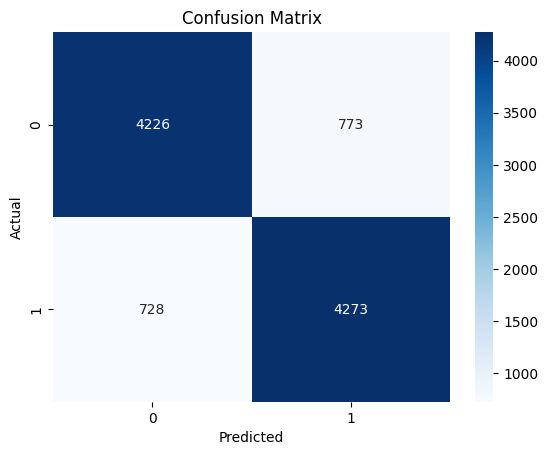

In [23]:
#now checking the confusion matrix to see true positive and true negative.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy:", lr.score(X_test, y_test))


Logistic Regression Accuracy: 0.8869


In [47]:
#function to process the user input review
def predict_sentiment(review):
    # Preprocess the input review
    cleaned = preprocess(review)

    # Convert to vector using the SAME vectorizer
    vector = vectorizer.transform([cleaned])

    # Predict sentiment
    prediction = model.predict(vector)[0]

    # Output result
    sentiment = 'Positive 😊' if prediction == 1 else 'Negative 😞'
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")

# 🔽 Example: Try it out
your_review = "THE MOVIE WAS trash , but i loved the character soo much"
predict_sentiment(your_review)

# You can change `your_review` to anything you want and rerun


Review: THE MOVIE WAS trash , but i loved the character soo much
Predicted Sentiment: Negative 😞
